In [37]:
import golfy
import numpy as np

num_peptides = 1000
peptides_per_pool = 10
num_hits = 50
max_activity_per_well = 2000
replicates = 3
min_background_peptide_activity = 0
max_background_peptide_activity = 10

min_hit_peptide_activity = 100
max_hit_peptide_activity = 500

background_peptide_activity_range = max_background_peptide_activity - min_background_peptide_activity
hit_peptide_activity_range = max_hit_peptide_activity - min_hit_peptide_activity

s = golfy.init(num_peptides, peptides_per_pool, replicates);
assert golfy.optimize(s, verbose=True, max_iters=500)

all_peptides = np.arange(num_peptides)
np.random.shuffle(all_peptides)
hit_peptides = all_peptides[:num_hits]
not_hit_peptides = all_peptides[num_hits:]
print("Hits: %s" % (hit_peptides,))

background = (
    np.random.rand(num_peptides) * background_peptide_activity_range + min_background_peptide_activity
).astype(int)
background[hit_peptides] = 0
print("Background activity: %s" % (background,))

hit_activity = np.random.rand(num_peptides) * hit_peptide_activity_range + min_hit_peptide_activity
hit_activity[not_hit_peptides] = 0
print("Hit activity: %s" % (hit_activity,))

spot_counts =  {
    r: {
        pool: min(max_activity_per_well, int(sum([background[i] + hit_activity[i] for i in peptides])))
        for (pool, peptides) in d.items()
    } 
    for (r, d) in s.assignments.items()
}
print("Spot counts: %s" % (spot_counts,))


Initial solution has 124 violations
1) 124 -> 84
2) 84 -> 44
3) 44 -> 18
4) 18 -> 8
5) 8 -> 4
6) 4 -> 0
Found valid solution after 6 swaps
Hits: [923 742 248 899  95 660 404 670 503 681 738  92 912 843 310 784 355 487
 513 893 400 620 731 897  90 809 919 252 827 447 100 383 993 796 955 113
 364 976 446 377 401 960 470 788 891  22  28 996 143 542]
Background activity: [6 1 1 1 8 5 9 3 6 1 5 0 3 9 0 7 6 5 5 3 8 3 0 0 3 3 8 9 0 9 1 1 0 7 4 6 8
 6 4 4 2 0 6 6 1 3 6 4 8 5 8 2 8 6 4 2 3 4 7 1 1 0 1 6 6 7 0 7 1 9 8 5 3 5
 3 0 1 7 1 1 7 4 1 5 6 7 1 5 9 9 0 1 0 5 0 0 3 6 0 6 0 6 9 7 8 1 6 9 6 1 1
 6 6 0 6 6 3 0 6 3 5 3 6 5 3 1 3 0 6 1 5 3 8 1 5 0 6 8 7 8 1 6 8 0 4 3 3 6
 3 9 1 3 6 0 0 7 1 4 8 8 4 6 3 2 1 1 0 3 2 3 7 1 7 3 3 5 3 6 4 5 0 1 0 8 4
 2 7 3 5 5 4 6 9 0 8 1 5 0 0 2 3 0 4 0 1 1 3 8 2 5 9 7 7 4 0 0 9 3 0 4 4 0
 1 7 6 4 4 3 8 7 0 6 9 2 1 5 3 2 6 3 9 4 7 2 8 3 8 1 0 4 7 7 0 0 0 1 7 8 4
 4 5 7 1 1 2 4 1 5 7 6 2 0 9 4 2 0 0 8 8 4 1 9 2 5 9 5 1 6 6 8 3 1 0 6 5 0
 5 0 2 7 2 9 9 7 8 1 9 2 8 4 0

In [38]:
A = np.zeros((s.num_pools(), num_peptides + 1)).astype(float)
b = np.zeros(s.num_pools()).astype(float)
pool_tuple_to_idx = {}
idx_to_pool_tuple = {}
i = 0
for (r, d) in spot_counts.items():
    for pool, spots in d.items():
        b[i] = spots
        pool_tuple_to_idx[(r, pool)] = i
        idx_to_pool_tuple[i] = (r, pool)
        for p in s.assignments[r][pool]:
            A[i, p] = 1
        # add a ones column for a constant offset
        A[i, num_peptides] = 1
        i += 1
print("Ax = b")
print("=======")
print("A.shape: %s" % (A.shape,))
print("b.shape: %s" % (b.shape,))
print("A:\n%s" % (A,))
print("A col sums: %s" % (A.sum(axis=0)))
print("A row sums: %s" % (A.sum(axis=1)))
print("b:\n%s" % (b,))



Ax = b
A.shape: (300, 1001)
b.shape: (300,)
A:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
A col sums: [  3.   3.   3. ...   3.   3. 300.]
A row sums: [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11

In [39]:
x, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

In [40]:
x

array([ 48.17790364,  35.07281646,  -0.37767629, ...,  75.26564475,
       -21.70350408, 181.02121212])

In [41]:
import sklearn.linear_model
ridge = sklearn.linear_model.Ridge(fit_intercept=False, positive=True)
ridge.fit(A, b)
reconstruction = ridge.predict(A);
reconstruction.astype(int)


array([  91,   81,  394,  578,   48,   54,   78,  401,  231,  285,   77,
         70,   74,   80,   77,  380,  609,   95,  442,  319,   46,   65,
         47,   44,   51,  211,   63,   49,   68,   65,   63,  232,  303,
         60,   73,  463,  212,  417,   73,  163,   85,   94,   84,  703,
        438,   51,   50,   71,   94,  460,   61,   70,  252,   64,   77,
         83,   73,   58,   59,  401,  400,  220,  459,  178,  103,   98,
         80,   62,  431,   94,   89,  470,  318,  351,  482,  429,   92,
        445,  391,  270,   60,   61,  180,  668,   64,   82,   58,   55,
         57,  241,   46,   66,   96,   65,  360, 1024,   82,  365,  363,
        119,  371,   70,   87,   60,   67,   75,  297,  405,  406,  402,
         70,  290,  359,  404,   69,   64,   96,  445,  379,   46,   57,
         50,   45,   60,   50,   54,   70,  206,   57,   61,   56,  508,
         63,   65,  481,  391,   79,  297,   68,   49,   90,   87,  377,
         69,  430,   79,  457,  378,   84,   78,   

In [42]:
x_ridge_with_c = ridge.coef_; 
x_ridge = x_ridge_with_c[:-1]; x_ridge.astype(int)

array([ 60,  57,  17,   0,   0,   0,   0,  24,   0,  22,   0,   0,  31,
        29, 145,   0,   0,  84,   0,   0,   0,   0,  99,   0,   0,   0,
         0,  28, 102,   0,  31,  20,   7,   0,   0,  24,   0,   0,  30,
         0,   0,  63,   6,   0,   0,   0,   0,   5,   0,  27,   0,  41,
         0,   3,   0,  14,   1,   0,   0,  14,  33,   0,  38,   0,  23,
         0,   0,  28,   0,  19,  47,   4,   8,   0,   0,   0,   0,   9,
         0,   4,  32,   0,   0,   2,   4,   0,   0,   0,  41, 104,  30,
         0,  75,   0,   0,  92,   0,  24,   2,   0,  37,   0,   0,   3,
         0,  57,  79,  29,   0,  43,  68,   0,  19, 190,   0,  77,   0,
         0,   0,  23,   0,  54,  53,   0,   0,  39,  13,  39,   0,   1,
         0,  15,   0,   0,  12,  28,   0,  24,   0,   0,   6,  47,   0,
       248,   0,   0,   0,   0,   0,   0,   0,  73,  30,   0,   0,  54,
         0,  33,  34,  77,   0,   0,   0,   0,   0,   0,   7,   0,  64,
        38,  70,   0,   6,   0,   0,  64,   3,  17,   0,   0,  4

In [43]:
hit_activity.astype(int)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 190,   0,   0,   0,
         0,   0, 262,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 152,
         0, 335,   0,   0, 364,   0,   0,   0,   0, 139,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 368,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       446,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [44]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
encv = ElasticNetCV(verbose=1, fit_intercept=False, positive=True, l1_ratio=[0.5, 0.6, 0.7, 0.8, .9, .95, .99, 1])
encv.fit(A, b)
print(encv.l1_ratio_)
x_encv_with_c = encv.coef_
x_encv = x_encv_with_c[:-1]
hit_encv_array = np.where(x_encv >= 10)[0]
hit_encv_set = set(hit_encv_array)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.99


......................................................................................................[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.6s finished


In [57]:
len(set(hit_peptides).intersection(hit_encv_set)) / len(hit_peptides)


1.0

In [58]:
len(set(hit_peptides).intersection(hit_encv_set)) / len(set(hit_peptides).union(hit_encv_set)) 


0.2358490566037736

<Axes: >

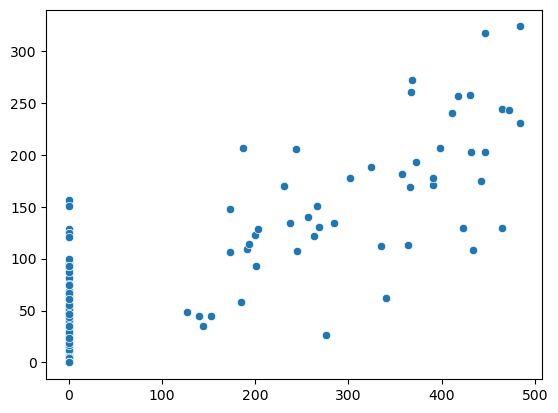

In [59]:
import seaborn
seaborn.scatterplot(x=hit_activity, y=x_encv)

In [61]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(verbose=1, fit_intercept=False, positive=True, alphas=[0.25, 0.5, 1, 5, 10, 20])
lasso.fit(A, b)
x_lasso_with_c = encv.coef_
x_lasso = x_lasso_with_c[:-1]
hit_lasso_array = np.where(x_lasso >= 10)[0]
hit_lasso_set = set(hit_lasso_array)
print(lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
......................

1.0


........[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [62]:
len(set(hit_peptides).intersection(hit_lasso_set)) / len(hit_peptides)


1.0

In [63]:
len(set(hit_peptides).intersection(hit_lasso_set)) / len(hit_lasso_set)


0.2358490566037736

In [64]:
active_set = hit_lasso_set
print("Recall: %0.2f" % (
      len(set(active_set).intersection(set(hit_peptides))) / len(hit_peptides)))
print("Precision: %0.2f" % (
      len(set(active_set).intersection(set(hit_peptides))) / len(set(active_set)) ))


Recall: 1.00
Precision: 0.24


<Axes: >

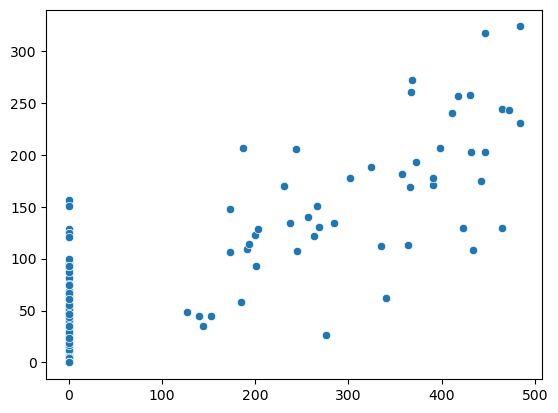

In [65]:
import seaborn
seaborn.scatterplot(x=hit_activity, y=x_lasso)

<Axes: xlabel='lasso_frac', ylabel='true_activity'>

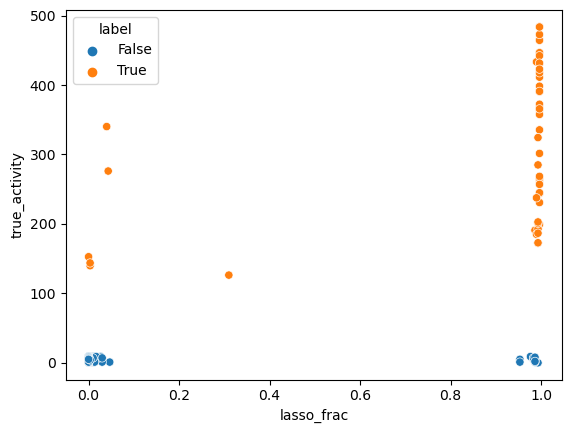

In [66]:
import pandas as pd
import random
import sklearn.linear_model
import seaborn 
A_inv = np.linalg.pinv(A)
x_est_inv = A_inv @ b

lasso = sklearn.linear_model.Lasso(fit_intercept=False, selection='random', positive=True, alpha=1)
row_indices = list(range(A.shape[0]))
x_lasso = np.zeros(num_peptides)
frac = np.zeros(num_peptides)
for loo_idx in row_indices[:-1]:
    subset_indices = np.array([i for i in row_indices if i != loo_idx])
    A_subset = A[subset_indices, :]
    b_subset = b[subset_indices]
    lasso.fit(A_subset, b_subset)
    x_lasso += lasso.coef_[:-1]
    frac += lasso.coef_[:-1] > 1
x_lasso /= len(row_indices)
frac /= len(row_indices)
df = pd.DataFrame({
    "background": background,
    "hit": hit_activity,
    "true_activity": hit_activity + background,
    "est_activity_ridge": x_ridge,
    "est_activity_pinv": x_est_inv[:-1],
    "est_activity_lasso": x_lasso,
    "est_activity_encv": x_encv,
    "lasso_frac": frac,
    "label": hit_activity> 0})
seaborn.scatterplot(data=df, x="lasso_frac", y="true_activity", hue="label")

<Axes: >

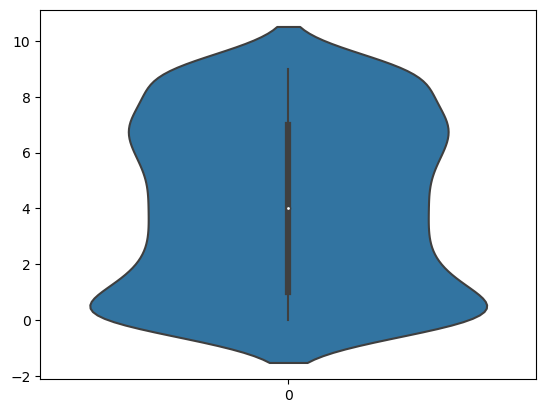

In [67]:
seaborn.violinplot(data=df.background)

<Axes: >

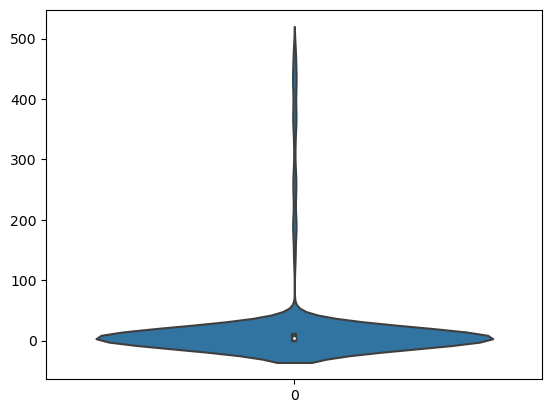

In [68]:
seaborn.violinplot(data=df.true_activity)

In [74]:
sorted(hit_peptides)

[22,
 28,
 90,
 92,
 95,
 100,
 113,
 143,
 248,
 252,
 310,
 355,
 364,
 377,
 383,
 400,
 401,
 404,
 446,
 447,
 470,
 487,
 503,
 513,
 542,
 620,
 660,
 670,
 681,
 731,
 738,
 742,
 784,
 788,
 796,
 809,
 827,
 843,
 891,
 893,
 897,
 899,
 912,
 919,
 923,
 955,
 960,
 976,
 993,
 996]

In [75]:
hit_activity[21]

0.0

In [76]:
lasso.coef_

array([  0.        ,   0.        ,   0.        , ...,   0.        ,
         0.        , 102.86962933])

In [77]:
lasso.coef_[:-1]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 170.20978855,   0.        ,
         0.        ,   1.14277236,   0.        ,   0.        ,
         0.        ,   0.        ,  56.14980367,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        97.13055757,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [78]:
import sklearn.linear_model
lasso = sklearn.linear_model.Lasso(fit_intercept=False)

lasso.fit(A, b)
x_lasso_with_c = lasso.coef_
x_lasso = x_lasso_with_c[:-1]

In [79]:
active_set = np.where(x_lasso)[0]

In [80]:
active_set

array([ 14,  17,  22,  28,  89,  92,  95, 105, 113, 143, 248, 252, 310,
       343, 355, 364, 377, 383, 400, 401, 404, 446, 447, 470, 487, 498,
       503, 513, 542, 619, 620, 660, 670, 681, 728, 733, 738, 742, 768,
       784, 788, 796, 809, 827, 843, 891, 893, 897, 899, 919, 923, 955,
       960, 965, 976, 991, 993, 996])

In [81]:
sorted(hit_peptides)

[22,
 28,
 90,
 92,
 95,
 100,
 113,
 143,
 248,
 252,
 310,
 355,
 364,
 377,
 383,
 400,
 401,
 404,
 446,
 447,
 470,
 487,
 503,
 513,
 542,
 620,
 660,
 670,
 681,
 731,
 738,
 742,
 784,
 788,
 796,
 809,
 827,
 843,
 891,
 893,
 897,
 899,
 912,
 919,
 923,
 955,
 960,
 976,
 993,
 996]

In [82]:
reconstruction = A @ x_lasso_with_c

In [83]:
reconstruction.shape

(300,)

In [84]:
b.shape

(300,)

In [85]:
reconstruction.astype(int)

array([ 103,  103,  369,  508,  103,  103,  103,  358,  158,  219,  103,
        103,  103,  103,  103,  300,  527,  103,  377,  265,  103,  103,
        103,  103,  103,  164,  103,  103,  103,  103,  103,  229,  233,
        103,  103,  406,  209,  339,  103,  104,  103,  103,  103,  639,
        374,  103,  103,  103,  103,  413,  103,  103,  199,  103,  103,
        103,  103,  103,  103,  343,  451,  165,  409,  103,  103,  103,
        103,  103,  369,  103,  103,  411,  247,  297,  463,  362,  103,
        343,  358,  225,  103,  103,  103,  552,  103,  103,  103,  103,
        103,  182,  103,  103,  103,  103,  237, 1014,  103,  311,  348,
        103,  325,  103,  103,  103,  103,  103,  219,  321,  379,  369,
        103,  232,  265,  367,  103,  103,  103,  411,  296,  103,  103,
        103,  103,  103,  103,  103,  103,  164,  103,  103,  103,  377,
        103,  103,  377,  271,  103,  290,  103,  103,  103,  103,  420,
        103,  374,  103,  413,  321,  103,  103,  1

In [86]:
b.astype(int)

array([  46,   40,  433,  642,   25,   49,   51,  428,  235,  310,   50,
         49,   53,   51,   50,  418,  681,   56,  483,  351,   38,   44,
         40,   36,   38,  233,   56,   40,   53,   45,   34,  222,  309,
         44,   56,  506,  219,  457,   31,  161,   50,   50,   52,  779,
        481,   42,   17,   59,   48,  508,   47,   51,  293,   48,   43,
         67,   54,   42,   41,  444,  449,  239,  511,  177,   36,   33,
         47,   30,  475,   43,   36,  489,  320,  365,  529,  472,   43,
        477,  416,  288,   34,   56,  186,  728,   40,   59,   51,   42,
         39,  286,   35,   29,   48,   43,  371, 1142,   42,  366,  401,
         61,  392,   38,   52,   37,   37,   50,  323,  448,  439,  443,
         36,  317,  373,  443,   50,   39,   55,  491,  411,   26,   48,
         28,   46,   50,   41,   37,   58,  232,   30,   53,   39,  564,
         38,   46,  521,  397,   45,  326,   38,   27,   44,   53,  416,
         42,  476,   53,  518,  396,   33,   54,   

In [87]:
diff =  b - reconstruction

In [88]:
diff[diff < 0] = 0

In [89]:
diff.astype(int)

array([  0,   0,  63, 133,   0,   0,   0,  69,  76,  90,   0,   0,   0,
         0,   0, 117, 153,   0, 105,  85,   0,   0,   0,   0,   0,  68,
         0,   0,   0,   0,   0,   0,  75,   0,   0,  99,   9, 117,   0,
        56,   0,   0,   0, 139, 106,   0,   0,   0,   0,  94,   0,   0,
        93,   0,   0,   0,   0,   0,   0, 100,   0,  73, 101,  73,   0,
         0,   0,   0, 105,   0,   0,  77,  72,  67,  65, 109,   0, 133,
        57,  62,   0,   0,  82, 175,   0,   0,   0,   0,   0, 103,   0,
         0,   0,   0, 133, 127,   0,  54,  52,   0,  66,   0,   0,   0,
         0,   0, 103, 126,  59,  73,   0,  84, 107,  75,   0,   0,   0,
        79, 114,   0,   0,   0,   0,   0,   0,   0,   0,  67,   0,   0,
         0, 186,   0,   0, 143, 125,   0,  35,   0,   0,   0,   0,   0,
         0, 101,   0, 104,  74,   0,   0,   0,   0,   0,  95, 101,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  70,   0, 158,  96,
       101,   0,   0, 119, 122, 117, 112,   0, 188,   0,  99,   

In [90]:
import scipy

In [91]:
"""
    x(N,) or (N, K) ndarray

        Least-squares solution.
    residues(K,) ndarray or float

        Square of the 2-norm for each column in b - a x, if M > N and ndim(A) == n (returns a scalar if b is 1-D). Otherwise a (0,)-shaped array is returned.
    rankint

        Effective rank of a.
    s(min(M, N),) ndarray or None

        Singular values of a. The condition number of a is s[0] / s[-1].
"""
x_least_squares, residues, rank, signular_values = scipy.linalg.lstsq(A, diff)

In [92]:
x_least_squares.astype(int)

array([-75445843612716,  86325536612885,  52195717635547, ...,
        -5336888370419,  -7305296463513,  24952349438430])

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False, positive=True)

In [94]:
lr.fit(A, diff)

LinearRegression(fit_intercept=False, positive=True)

In [95]:
x_lr = lr.coef_

In [96]:
reconstruction_of_difference = A @ x_lr

In [97]:
reconstruction_of_difference.astype(int)

array([ 13,   5,  68, 125,   4,   0,   1,  81,  73,  92,   9,   6,   2,
         7,   6, 112, 146,   9, 104,  85,   3,   0,   0,   3,   0,  75,
         7,   0,   7,   7,  23,  23,  88,  12,  11,  95,  28, 115,  19,
        66,   6,   8,   3, 130, 103,   0,   0,   2,   0,  94,   1,   4,
        96,   1,   2,   1,   8,   5,   5, 103,  21,  78, 105,  79,   8,
         8,  11,   5, 105,   8,  14,  89,  82,  75,  70, 109,   7, 130,
        63,  66,   0,   0,  80, 164,   0,   0,   0,   0,   0,  99,   2,
         6,   8,   6, 125, 115,   8,  59,  61,   4,  79,   4,   5,   4,
         1,   3, 103, 120,  69,  74,   2,  84, 106,  80,   4,   4,   6,
        86, 111,   3,   0,   0,   0,   3,   0,   7,   7,  75,   3,   7,
         2, 164,   2,   1, 134, 116,  12,  49,   0,   0,  13,   0,  19,
         6, 103,   3, 107,  83,   8,   4,   1,   2,   0,  96, 100,   2,
         8,   5,   5,   8,   0,   2,   7,   2,   0,  75,   5, 148,  94,
        95,   9,   0, 112, 114, 107, 101,   0, 172,   0,  91,   

In [98]:
(reconstruction_of_difference + reconstruction).astype(int)

array([ 116,  109,  438,  634,  107,  104,  104,  440,  232,  312,  112,
        109,  106,  111,  110,  412,  674,  113,  482,  351,  106,  103,
        103,  106,  103,  239,  110,  103,  110,  110,  127,  253,  321,
        115,  115,  501,  238,  454,  122,  170,  110,  112,  107,  769,
        478,  103,  104,  105,  103,  508,  105,  108,  295,  104,  105,
        104,  111,  109,  109,  447,  473,  244,  514,  183,  112,  111,
        114,  108,  475,  112,  117,  501,  330,  372,  534,  472,  111,
        473,  421,  291,  103,  103,  184,  717,  103,  103,  103,  103,
        103,  282,  105,  110,  112,  110,  363, 1130,  111,  371,  409,
        108,  405,  107,  108,  108,  104,  107,  323,  442,  448,  444,
        106,  316,  372,  448,  108,  107,  110,  498,  407,  106,  103,
        103,  103,  106,  103,  110,  110,  239,  106,  110,  106,  541,
        105,  105,  511,  387,  115,  340,  103,  104,  116,  103,  440,
        110,  477,  106,  521,  405,  111,  108,  1

In [99]:
b

array([  46.,   40.,  433.,  642.,   25.,   49.,   51.,  428.,  235.,
        310.,   50.,   49.,   53.,   51.,   50.,  418.,  681.,   56.,
        483.,  351.,   38.,   44.,   40.,   36.,   38.,  233.,   56.,
         40.,   53.,   45.,   34.,  222.,  309.,   44.,   56.,  506.,
        219.,  457.,   31.,  161.,   50.,   50.,   52.,  779.,  481.,
         42.,   17.,   59.,   48.,  508.,   47.,   51.,  293.,   48.,
         43.,   67.,   54.,   42.,   41.,  444.,  449.,  239.,  511.,
        177.,   36.,   33.,   47.,   30.,  475.,   43.,   36.,  489.,
        320.,  365.,  529.,  472.,   43.,  477.,  416.,  288.,   34.,
         56.,  186.,  728.,   40.,   59.,   51.,   42.,   39.,  286.,
         35.,   29.,   48.,   43.,  371., 1142.,   42.,  366.,  401.,
         61.,  392.,   38.,   52.,   37.,   37.,   50.,  323.,  448.,
        439.,  443.,   36.,  317.,  373.,  443.,   50.,   39.,   55.,
        491.,  411.,   26.,   48.,   28.,   46.,   50.,   41.,   37.,
         58.,  232.,

In [100]:
difference2 = b - reconstruction_of_difference

In [101]:
difference2.astype(int)

array([  32,   34,  364,  516,   20,   48,   49,  346,  161,  217,   40,
         42,   50,   43,   43,  305,  534,   46,  378,  265,   34,   44,
         40,   32,   38,  157,   48,   40,   45,   37,   10,  198,  220,
         31,   44,  410,  190,  341,   11,   94,   43,   41,   48,  648,
        377,   42,   16,   56,   47,  413,   45,   46,  196,   46,   40,
         65,   45,   36,   35,  340,  427,  160,  405,   97,   27,   24,
         35,   24,  369,   34,   21,  399,  237,  289,  458,  362,   35,
        346,  352,  221,   34,   56,  105,  563,   40,   59,   51,   42,
         39,  186,   32,   22,   39,   36,  245, 1026,   33,  306,  339,
         56,  312,   33,   46,   32,   35,   46,  219,  327,  369,  368,
         33,  232,  266,  362,   45,   34,   48,  404,  299,   22,   48,
         27,   46,   46,   41,   29,   50,  156,   26,   45,   36,  399,
         35,   44,  386,  280,   32,  276,   38,   26,   30,   52,  396,
         35,  372,   49,  410,  312,   24,   49,   

In [102]:
lasso2 = sklearn.linear_model.Lasso(fit_intercept=False)

In [103]:
lasso2.fit(A, difference2)

Lasso(fit_intercept=False)

In [104]:
x_lasso2_with_c = lasso2.coef_

In [105]:
x_lasso2 = x_lasso2_with_c[:-1]

In [106]:
hits2 = np.where(x_lasso2 > 0)[0]

In [107]:
hits2

array([ 14,  28,  92,  95, 113, 143, 248, 252, 263, 310, 343, 355, 364,
       377, 383, 400, 401, 404, 446, 447, 470, 487, 498, 503, 542, 619,
       620, 660, 670, 681, 728, 733, 738, 784, 788, 809, 827, 843, 891,
       893, 897, 899, 923, 955, 965, 976, 991, 993, 996])

In [108]:
len(hits2)

49

In [109]:
len(active_set)

58

In [110]:
len(set(hit_peptides).intersection(set(active_set))) / len(active_set)

0.7931034482758621

In [111]:
len(set(hit_peptides).intersection(set(hits2))) / len(hits2)

0.8163265306122449

In [112]:
len(hits2)

49

In [113]:
len(hit_peptides)

50

In [114]:
set(hit_peptides).intersection(set(hits2))

{28,
 92,
 95,
 113,
 143,
 248,
 252,
 310,
 355,
 364,
 377,
 383,
 400,
 401,
 404,
 446,
 447,
 470,
 487,
 503,
 542,
 620,
 660,
 670,
 681,
 738,
 784,
 788,
 809,
 827,
 843,
 891,
 893,
 897,
 899,
 923,
 955,
 976,
 993,
 996}

In [115]:
set(hit_peptides)

{22,
 28,
 90,
 92,
 95,
 100,
 113,
 143,
 248,
 252,
 310,
 355,
 364,
 377,
 383,
 400,
 401,
 404,
 446,
 447,
 470,
 487,
 503,
 513,
 542,
 620,
 660,
 670,
 681,
 731,
 738,
 742,
 784,
 788,
 796,
 809,
 827,
 843,
 891,
 893,
 897,
 899,
 912,
 919,
 923,
 955,
 960,
 976,
 993,
 996}

In [116]:
set(hit_peptides).difference(set(hits2))

{22, 90, 100, 513, 731, 742, 796, 912, 919, 960}

In [117]:
set(hits2).difference(set(hit_peptides))

{14, 263, 343, 498, 619, 728, 733, 965, 991}

In [118]:
def iterative(A, b, max_iters=15):
    from sklearn.linear_model import Ridge, Lasso
    ridge = Ridge(fit_intercept=False, positive=True, alpha=100)
    lasso = Lasso(fit_intercept=False, positive=True, alpha=1)
    residuals_after_l2 = b.copy()
    residuals_after_l1 = b.copy()
    for i in range(max_iters):

        lasso.fit(A, residuals_after_l2)
        x_lasso_with_c = lasso.coef_
        reconstruction_l1 = A @ x_lasso_with_c 
        residuals_after_l1 = np.maximum(0, b - reconstruction_l1)
        
        ridge.fit(A, residuals_after_l1)
        x_ridge_with_c = ridge.coef_
        reconstruction_l2 = A @ x_ridge_with_c
        residuals_after_l2 = np.maximum(0, b - reconstruction_l2)
        
        x_lasso = x_lasso_with_c[:-1]
        active_set = np.where(x_lasso > 1)[0]
        
        # print(residuals_after_l2.astype(int))
        print(i, sorted(set(active_set)))
    return active_set

In [119]:
active_set = iterative(A, b);
active_set

0 [14, 17, 22, 28, 89, 92, 95, 105, 113, 143, 248, 252, 310, 343, 355, 364, 377, 383, 400, 401, 404, 446, 447, 470, 487, 498, 503, 513, 542, 619, 620, 660, 670, 681, 728, 733, 738, 742, 768, 784, 788, 809, 827, 843, 891, 893, 897, 899, 919, 923, 955, 965, 976, 991, 993, 996]
1 [14, 22, 28, 89, 92, 95, 105, 113, 143, 248, 252, 310, 343, 355, 364, 377, 383, 400, 401, 404, 446, 447, 470, 487, 498, 503, 513, 542, 619, 620, 660, 670, 681, 728, 733, 738, 742, 768, 784, 788, 809, 827, 843, 891, 893, 897, 899, 919, 923, 955, 965, 976, 991, 993, 996]
2 [14, 22, 28, 89, 92, 95, 105, 113, 143, 248, 252, 310, 343, 355, 364, 377, 383, 400, 401, 404, 446, 447, 470, 487, 498, 503, 513, 542, 619, 620, 660, 670, 681, 728, 733, 738, 742, 768, 784, 788, 809, 827, 843, 891, 893, 897, 899, 919, 923, 955, 965, 976, 991, 993, 996]
3 [14, 22, 28, 89, 92, 95, 105, 113, 143, 248, 252, 310, 343, 355, 364, 377, 383, 400, 401, 404, 446, 447, 470, 487, 498, 503, 513, 542, 619, 620, 660, 670, 681, 728, 733, 738, 742

array([ 14,  22,  28,  89,  92,  95, 105, 113, 143, 248, 252, 310, 343,
       355, 364, 377, 383, 400, 401, 404, 446, 447, 470, 487, 498, 503,
       513, 542, 619, 620, 660, 670, 681, 728, 733, 738, 742, 768, 784,
       788, 809, 827, 843, 891, 893, 897, 899, 919, 923, 955, 965, 976,
       991, 993, 996])

In [120]:
print("Recall: %0.2f" % (
      len(set(active_set).intersection(set(hit_peptides))) / len(hit_peptides)))
print("Precision: %0.2f" % (
      len(set(active_set).intersection(set(hit_peptides))) / len(set(active_set)) ))


Recall: 0.88
Precision: 0.80


In [121]:
set(hit_peptides).difference(set(active_set))

{90, 100, 731, 796, 912, 960}

In [122]:
set(active_set).intersection(set(hit_peptides))

{22,
 28,
 92,
 95,
 113,
 143,
 248,
 252,
 310,
 355,
 364,
 377,
 383,
 400,
 401,
 404,
 446,
 447,
 470,
 487,
 503,
 513,
 542,
 620,
 660,
 670,
 681,
 738,
 742,
 784,
 788,
 809,
 827,
 843,
 891,
 893,
 897,
 899,
 919,
 923,
 955,
 976,
 993,
 996}

In [123]:
set(active_set).intersection(set(hit_peptides))

{22,
 28,
 92,
 95,
 113,
 143,
 248,
 252,
 310,
 355,
 364,
 377,
 383,
 400,
 401,
 404,
 446,
 447,
 470,
 487,
 503,
 513,
 542,
 620,
 660,
 670,
 681,
 738,
 742,
 784,
 788,
 809,
 827,
 843,
 891,
 893,
 897,
 899,
 919,
 923,
 955,
 976,
 993,
 996}

In [124]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [125]:
x_encv.astype(int)

array([ 31,  17,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  17,
         0, 156,   0,   0,  64,   0,   0,   0,   0, 109,   0,   0,   0,
         0,   0, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  38,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14,
         0,   0,   0,   0,   0,   0,   0,   0,  20,   0,   0,   0,   3,
         0,   0,   6,   0,   0,  16,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,  54, 121,  44,
         0, 112,   0,   0, 112,   0,   4,   0,   0,  45,   0,   0,   0,
         0,  56,  47,  17,   0,  21,  20,   0,   0, 271,   0,  80,   0,
         0,   0,   0,   0,  39,  42,   0,   0,  40,   0,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  34,   0,
       316,   0,   0,   0,   0,   0,   0,   0,  36,   5,   0,   0,  12,
         0,  21,   3,  52,   0,   0,   0,   0,   0,   0,   0,   0,  12,
        27,  55,   0,   0,   0,   0,  33,   0,   0,   0,   0,  1

In [126]:
hit_activity.astype(int)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 190,   0,   0,   0,
         0,   0, 262,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 152,
         0, 335,   0,   0, 364,   0,   0,   0,   0, 139,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 368,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       446,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

<Axes: >

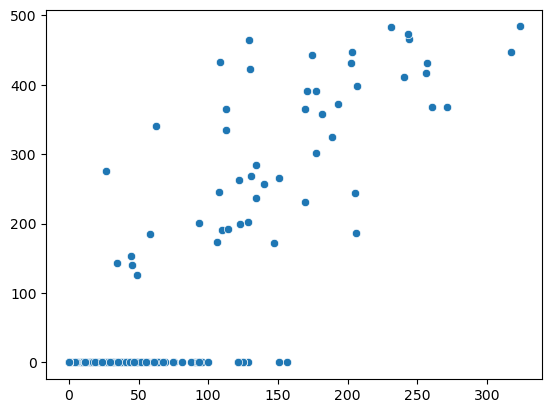

In [127]:
seaborn.scatterplot(x=x_encv, y=hit_activity)

In [128]:
import logging
import os

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyro

In [129]:
assert pyro.__version__.startswith('1.8.5')

pyro.enable_validation(True)
pyro.set_rng_seed(1)
logging.basicConfig(format='%(message)s', level=logging.INFO)

# Set matplotlib settings
%matplotlib inline
plt.style.use('default')

In [132]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import scipy.stats

from jax import pure_callback, random
import jax.numpy as jnp
import optax

import numpyro
from numpyro import handlers
from numpyro.contrib.funsor import config_enumerate, infer_discrete
import numpyro.distributions as dist
from numpyro.distributions import constraints
from numpyro.infer import SVI, TraceEnum_ELBO, init_to_value
from numpyro.infer.autoguide import AutoDelta


In [133]:
data = jnp.array([0.0, 1.0, 10.0, 11.0, 12.0])

Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'


In [134]:
K = 2  # Fixed number of components.


@config_enumerate
def model(data):

    weights = numpyro.sample("weights", dist.Dirichlet(0.5 * jnp.ones(K)))
    scale = numpyro.sample("scale", dist.LogNormal(0.0, 2.0))
    with numpyro.plate("components", K):
        locs = numpyro.sample("locs", dist.Normal(0.0, 10.0))

    with numpyro.plate("data", len(data)):
        # Local variables.
        assignment = numpyro.sample("assignment", dist.Categorical(weights))
        numpyro.sample("obs", dist.Normal(locs[assignment], scale), obs=data)

In [135]:
elbo = TraceEnum_ELBO()


def initialize(seed):
    global global_guide
    init_values = {
        "weights": jnp.ones(K) / K,
        "scale": jnp.sqrt(data.var() / 2),
        "locs": data[
            random.categorical(
                random.PRNGKey(seed), jnp.ones(len(data)) / len(data), shape=(K,)
            )
        ],
    }
    global_model = handlers.block(
        handlers.seed(model, random.PRNGKey(0)),
        hide_fn=lambda site: site["name"]
        not in ["weights", "scale", "locs", "components"],
    )
    global_guide = AutoDelta(
        global_model, init_loc_fn=init_to_value(values=init_values)
    )
    handlers.seed(global_guide, random.PRNGKey(0))(data)  # warm up the guide
    return elbo.loss(random.PRNGKey(0), {}, model, global_guide, data)


# Choose the best among 100 random initializations.
loss, seed = min((initialize(seed), seed) for seed in range(100))
initialize(seed)  # initialize the global_guide
print(f"seed = {seed}, initial_loss = {loss}")

seed = 8, initial_loss = 25.149845123291016


In [136]:
# Helper function to collect gradient norms during training
def hook_optax(optimizer):
    gradient_norms = defaultdict(list)

    def append_grad(grad):
        for name, g in grad.items():
            gradient_norms[name].append(float(jnp.linalg.norm(g)))
        return grad

    def update_fn(grads, state, params=None):
        grads = pure_callback(append_grad, grads, grads)
        return optimizer.update(grads, state, params=params)

    return optax.GradientTransformation(optimizer.init, update_fn), gradient_norms


optim, gradient_norms = hook_optax(optax.adam(learning_rate=0.1, b1=0.8, b2=0.99))
global_svi = SVI(model, global_guide, optim, loss=elbo)

In [139]:

%matplotlib inline

smoke_test = "CI" in os.environ
assert numpyro.__version__.startswith("0.12.1")


global_svi_result = global_svi.run(
    random.PRNGKey(0), 200 if not smoke_test else 2, data
)



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 708.41it/s, init loss: 25.1498, avg. loss [191-200]: 17.4433]


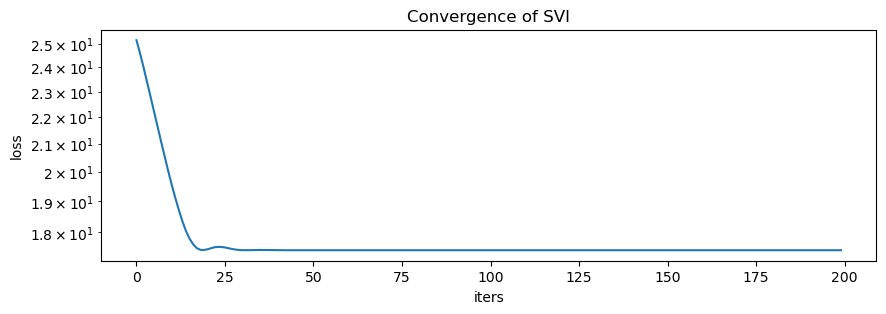

In [140]:
plt.figure(figsize=(10, 3), dpi=100).set_facecolor("white")
plt.plot(global_svi_result.losses)
plt.xlabel("iters")
plt.ylabel("loss")
plt.yscale("log")
plt.title("Convergence of SVI")
plt.show()

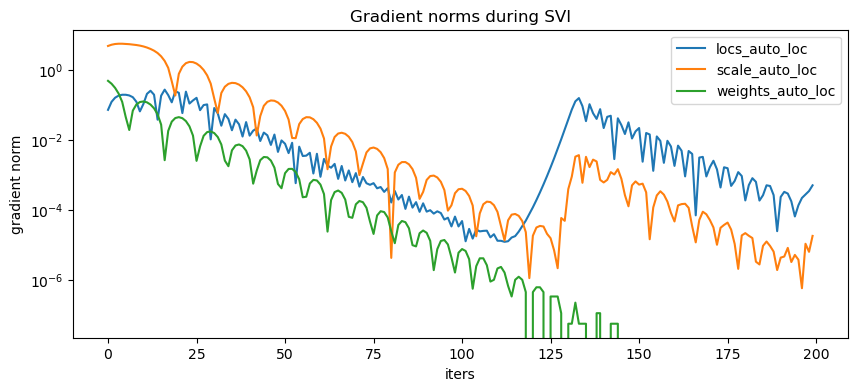

In [141]:
plt.figure(figsize=(10, 4), dpi=100).set_facecolor("white")
for name, grad_norms in gradient_norms.items():
    plt.plot(grad_norms, label=name)
plt.xlabel("iters")
plt.ylabel("gradient norm")
plt.yscale("log")
plt.legend(loc="best")
plt.title("Gradient norms during SVI")
plt.show()

In [142]:
map_estimates = global_svi_result.params
weights = map_estimates["weights_auto_loc"]
locs = map_estimates["locs_auto_loc"]
scale = map_estimates["scale_auto_loc"]
print(f"weights = {weights}")
print(f"locs = {locs}")
print(f"scale = {scale}")

weights = [0.375 0.625]
locs = [ 0.49895036 10.984347  ]
scale = 0.6514335870742798


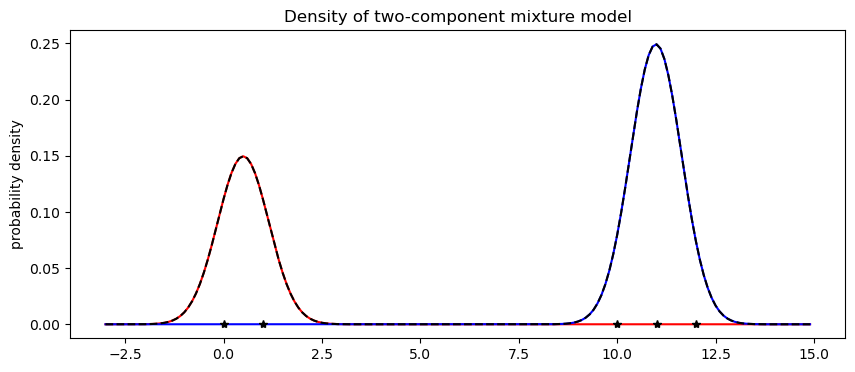

In [143]:
X = jnp.arange(-3, 15, 0.1)
Y1 = weights[0] * scipy.stats.norm.pdf((X - locs[0]) / scale)
Y2 = weights[1] * scipy.stats.norm.pdf((X - locs[1]) / scale)

plt.figure(figsize=(10, 4), dpi=100).set_facecolor("white")
plt.plot(X, Y1, "r-")
plt.plot(X, Y2, "b-")
plt.plot(X, Y1 + Y2, "k--")
plt.plot(data, jnp.zeros(len(data)), "k*")
plt.title("Density of two-component mixture model")
plt.ylabel("probability density")
plt.show()



In [158]:
ln1 = dist.LogNormal(0, 1)
ln2 = dist.LogNormal(4, 2)
for i in range(100):
    key = random.PRNGKey(i)
    print(ln1.sample(key=key), ln2.sample(key=key))

0.7343545 36.17309
0.16924185 5.111185
0.75019395 37.21711
5.245185 497.5755
0.22798209 7.604061
1.6737349 108.49925
1.0620757 59.163235
4.55954 412.79974
7.605811 816.65515
1.8347356 122.63351
0.13307923 3.7095814
0.83598584 42.99749
0.4628368 19.547073
3.9167001 337.08414
0.31635338 11.769047
1.110173 62.76231
1.2153068 70.80966
0.51355875 22.454226
10.025111 1180.2219
2.6838005 203.63147
0.32728076 12.314172
1.195061 69.241234
8.743195 983.41785
1.4722958 91.44739
0.1732593 5.273594
0.61588883 28.609772
0.63132644 29.569899
0.054591585 1.1306951
0.6717369 32.1201
1.0539485 58.56038
8.559927 956.02985
3.3132463 269.68054
2.7756336 212.97435
3.4457393 284.15448
2.6906536 204.32506
0.52828074 23.316551
0.41357613 16.823586
0.35723865 13.839565
52.71251 10791.029
0.9955248 54.272614
1.2368444 72.48776
1.3761852 83.57576
0.75800323 37.73456
3.3723025 276.1086
0.029485613 0.49734536
4.374106 390.56824
2.6567419 200.89867
1.7733129 117.19031
1.1197568 63.485752
4.8269677 445.39343
2.395430

In [209]:
np.log(2)

0.6931471805599453

In [153]:
np.exp(5)

148.4131591025766

In [165]:
f = numpyro.sample("latent_fairness", dist.Beta(1, 1), rng_key=key)

In [166]:
f

Array(0.47416914, dtype=float32)

In [244]:


@config_enumerate
def model2(data):
    latent_prob_hit = numpyro.sample("latent_prob_hit", dist.Beta(0.01, 5))

    noise_mean = numpyro.sample("noise_mean", dist.LogNormal(0.0, 0.5))
    noise_scale = numpyro.sample("noise_scale", dist.LogNormal(0.5, 0.5))
    hit_mean = numpyro.sample("hit_mean", dist.LogNormal(1.5, 1))
    hit_scale = numpyro.sample("hit_scale", dist.LogNormal(0.75, 1))

    with numpyro.plate("data", len(data)) as ind:
        # Local variables.
        prob_hits =  numpyro.sample("prob_hit", dist.Bernoulli(latent_prob_hit))
        
        obs_as_hit = numpyro.sample("obs_as_hit", dist.LogNormal(hit_mean, hit_scale))
        obs_as_background = numpyro.sample("obs_as_background",  dist.LogNormal(noise_mean, noise_scale))
        numpyro.sample("obs", 
                       dist.Mixture(mixing_distribution=dist.Categorical(probs = jnp.array([latent_prob_hit, 1-latent_prob_hit])), 
                       component_distributions=[
                           dist.LogNormal(hit_mean, hit_scale),
                           dist.LogNormal(noise_mean, noise_scale)
                       ]))
                       

elbo = TraceEnum_ELBO()


def initialize2(seed):
    global global_guide2
    init_values = {
        "latent_prob_hit": 0.2,
        "noise_mean": 0,
        "noise_scale": 1,
        "hit_mean": 4, 
        "hit_scale": 2,
    }
    global_model = handlers.block(
        handlers.seed(model2, random.PRNGKey(0)),
        hide_fn=lambda site: site["name"]
        not in ["latent_prob_hit", "noise_mean", "noise_scale", "hit_mean", "hit_scale"],
    )
    global_guide2 = AutoDelta(
        global_model, init_loc_fn=init_to_value(values=init_values)
    )
    handlers.seed(global_guide2, random.PRNGKey(0))(data)  # warm up the guide
    return elbo.loss(random.PRNGKey(0), {}, model2, global_guide2, data)

import jax
# Choose the best among 100 random initializations.
with jax.checking_leaks():
    loss, seed = min((initialize2(seed), seed) for seed in range(100))
initialize2(seed)  # initialize the global_guide
print(f"seed = {seed}, initial_loss = {loss}")

Exception: Leaked trace MainTrace(1,DynamicJaxprTrace). Leaked tracer(s):

Traced<ShapedArray(uint32[2])>with<DynamicJaxprTrace(level=1/0)>
This DynamicJaxprTracer was created on line /var/folders/qm/qf74v01n2s12j3w0h1yrx4l00000gn/T/ipykernel_69841/3847662798.py:16 (model2)
<DynamicJaxprTracer 11981079472> is referred to by <seed 11984652368>.rng_key
<seed 11984652368> is referred to by <block 12120815216> in vars 'fn', '__wrapped__'
<block 12120815216> is referred to by <AutoDelta 11984647552>.model
<AutoDelta 11984647552> is referred to by <dict 4432371456>['global_guide2']
<dict 4432371456> is referred to by <ZMQInteractiveShell 4426375104>.user_ns
<ZMQInteractiveShell 4426375104> is referred to by <dict 4406359616>['_instance']
<dict 4406359616> is referred to by <MetaHasTraits 4520381632>
<MetaHasTraits 4520381632> is referred to by IPython.InteractiveShell


In [213]:
model([1,2,3])

AssertionError: 

In [172]:
((x_lasso.astype(int) + x_ridge.astype(int)) / 2).astype(int)

array([ 30,  28,   8,   0,   0,   0,   0,  12,   0,  11,   0,   0,  15,
        14, 157,   0,   0,  42,   0,   0,   0,   0,  77,   0,   0,   0,
         0,  14,  99,   0,  15,  10,   3,   0,   0,  12,   0,   0,  15,
         0,   0,  31,   3,   0,   0,   0,   0,   2,   0,  13,   0,  20,
         0,   1,   0,   7,   0,   0,   0,   7,  16,   0,  19,   0,  11,
         0,   0,  14,   0,   9,  23,   2,   4,   0,   0,   0,   0,   4,
         0,   2,  16,   0,   0,   1,   2,   0,   0,   0,  20,  53,  15,
         0, 118,   0,   0, 142,   0,  12,   1,   0,  18,   0,   0,   1,
         0,  40,  39,  14,   0,  21,  34,   0,   9, 253,   0,  38,   0,
         0,   0,  11,   0,  27,  26,   0,   0,  19,   6,  19,   0,   0,
         0,   7,   0,   0,   6,  14,   0,  12,   0,   0,   3,  23,   0,
       328,   0,   0,   0,   0,   0,   0,   0,  36,  15,   0,   0,  27,
         0,  16,  17,  38,   0,   0,   0,   0,   0,   0,   3,   0,  32,
        19,  35,   0,   3,   0,   0,  32,   1,   8,   0,   0,  2

<Axes: >

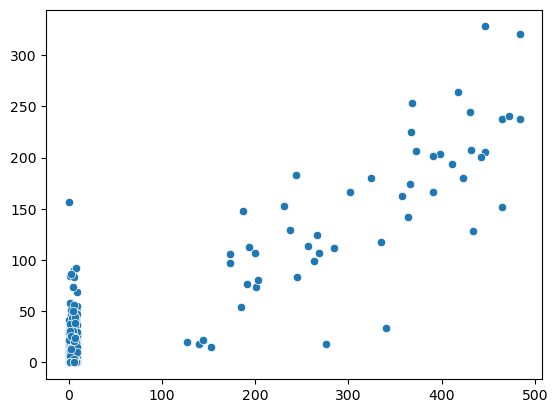

In [173]:
seaborn.scatterplot(
    x=hit_activity + background,
    y=((x_lasso.astype(int) + x_ridge.astype(int)) / 2).astype(int))

<Axes: >

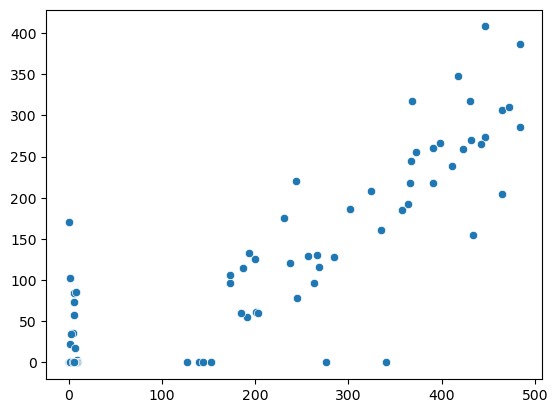

In [174]:
seaborn.scatterplot(
    x=hit_activity + background,
    y=x_lasso.astype(int))

<Axes: >

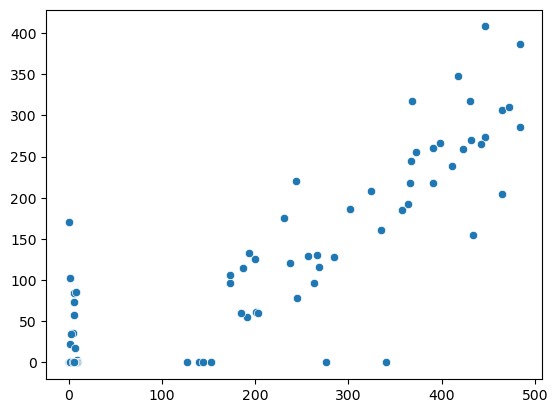

In [177]:
seaborn.scatterplot(
    x=hit_activity + background,
    y=x_lasso.astype(int))

In [182]:
b = dist.Bernoulli("prob_hit", 0.5)

In [186]:
b.sample(key, sample_shape=(1,))

TypeError: Cannot determine dtype of prob_hit

In [195]:
b = dist.Bernoulli(0.5)

In [198]:
a = b.sample(random.PRNGKey(10))

In [207]:
bool(b.sample(random.PRNGKey(3)))

False

In [214]:
beta = dist.Beta(1, 1)


In [215]:
beta.sample(key)

Array(0.47416914, dtype=float32)

In [281]:
from numpyro.distributions import MixtureGeneral


def deconv_model(A, b):
    n_pools, n_peptides = A.shape
    # Most of the model is identiacal to the one above...
    latent_prob_hit = numpyro.sample("latent_prob_hit", dist.Uniform(0.001, 0.45))

    noise_mean = numpyro.sample("noise_mean", dist.Uniform(0, 1))
    noise_scale = numpyro.sample("noise_scale", dist.Uniform(0, 2))
    hit_mean = numpyro.sample("hit_mean", dist.Uniform(2, 7))
    hit_scale = numpyro.sample("hit_scale", dist.Uniform(1, 4))
    
    
    Q = numpyro.sample("Q", dist.Bernoulli(latent_prob_hit))
    mixture = MixtureGeneral(
        dist.Categorical(probs=jnp.array([Q, 1.0 - Q])), [
            dist.LogNormal(hit_mean, hit_scale),
            dist.LogNormal(noise_mean, noise_scale)]
    )
    with numpyro.plate("peptides", n_peptides):
        peptide_activity = numpyro.sample("peptide_activity", mixture)
        
    with numpyro.plate("spots", len(b)):
        b_est = numpyro.deterministic("b_est", A @ peptide_activity)
        y_ = numpyro.sample("obs", obs=b)



In [282]:
import jax
import jax.numpy as jnp

import numpyro
from numpyro import distributions as dist, infer
numpyro.set_host_device_count(1)
print(jax.local_device_count())
# Our inference procedure is identical to the one above.
sampler = infer.MCMC(
    infer.NUTS(deconv_model),
    num_warmup=2000,
    num_samples=2000,
    num_chains=2,
    progress_bar=True,
)


1


/var/folders/qm/qf74v01n2s12j3w0h1yrx4l00000gn/T/ipykernel_69841/2508797545.py:9: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  sampler = infer.MCMC(


In [283]:
A_jax = jnp.array(A)
b_jax = jnp.array(hit_activity + background)
sampler.run(jax.random.PRNGKey(3), A_jax, b_jax)

(300, 1001)


/var/folders/qm/qf74v01n2s12j3w0h1yrx4l00000gn/T/ipykernel_69841/3047257216.py:3: FutureWarning: Some algorithms will automatically enumerate the discrete latent site Q of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  sampler.run(jax.random.PRNGKey(3), A_jax, b_jax)


ValueError: Incompatible shapes for broadcasting: shapes=[(1000,), (5,)]

In [277]:
b_jax

Array([  6.      ,   1.      ,   1.      ,   1.      ,   8.      ,
         5.      ,   9.      ,   3.      ,   6.      ,   1.      ,
         5.      ,   0.      ,   3.      ,   9.      ,   0.      ,
         7.      ,   6.      ,   5.      ,   5.      ,   3.      ,
         8.      ,   3.      , 190.88249 ,   0.      ,   3.      ,
         3.      ,   8.      ,   9.      , 262.9705  ,   9.      ,
         1.      ,   1.      ,   0.      ,   7.      ,   4.      ,
         6.      ,   8.      ,   6.      ,   4.      ,   4.      ,
         2.      ,   0.      ,   6.      ,   6.      ,   1.      ,
         3.      ,   6.      ,   4.      ,   8.      ,   5.      ,
         8.      ,   2.      ,   8.      ,   6.      ,   4.      ,
         2.      ,   3.      ,   4.      ,   7.      ,   1.      ,
         1.      ,   0.      ,   1.      ,   6.      ,   6.      ,
         7.      ,   0.      ,   7.      ,   1.      ,   9.      ,
         8.      ,   5.      ,   3.      ,   5.      ,   3.   

In [258]:
!pip install corner

In [260]:
!pip install arviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 13.4 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00


In [261]:
import arviz as az

inf_data = az.from_numpyro(sampler)
az.summary(inf_data)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Q,0.538,0.291,0.065,0.994,0.005,0.004,2942.0,2287.0,1.0
b,0.570,12.914,-5.505,8.647,0.204,0.145,3077.0,2685.0,1.0
b_perp,0.175,0.964,-1.592,2.053,0.017,0.017,3100.0,2719.0,1.0
bg_mean,0.094,0.997,-1.791,1.944,0.019,0.016,2728.0,2355.0,1.0
bg_sigma,2.435,1.759,0.002,5.561,0.029,0.021,2291.0,1272.0,1.0
m,1.322,15.865,-3.591,11.016,0.316,0.224,2681.0,2760.0,1.0
"p[0, 0]",-1.658,28.097,-2.891,-0.000,0.446,0.316,2645.0,2492.0,1.0
"p[0, 1]",-1.201,1.106,-3.191,0.000,0.022,0.016,2647.0,2492.0,1.0
"p[1, 0]",-1.685,25.442,-2.804,-0.000,0.469,0.332,2677.0,2455.0,1.0
"p[1, 1]",-1.200,1.098,-3.170,0.000,0.022,0.016,2678.0,2455.0,1.0


Too few points to create valid contours


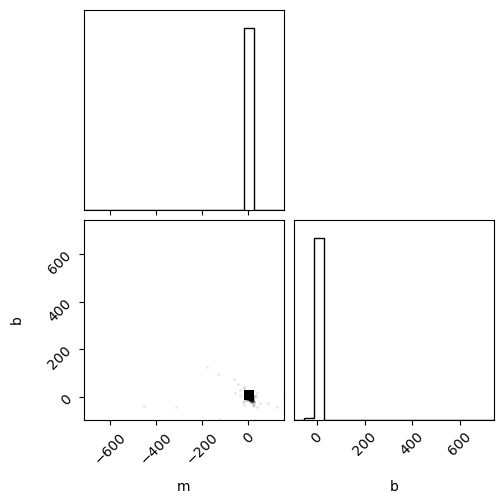

In [264]:
import corner; corner.corner(inf_data, var_names=["m", "b"]);